In [4]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [14]:
# Importar os dados
dataset = pd.read_csv('tempo.csv', sep=";")

# Visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
# Verificar o tamanho
dataset.shape

(14, 5)

In [23]:
# Explorar dados categóricos de Aparencia
clima = dataset.groupby('Aparencia').size()
clima

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

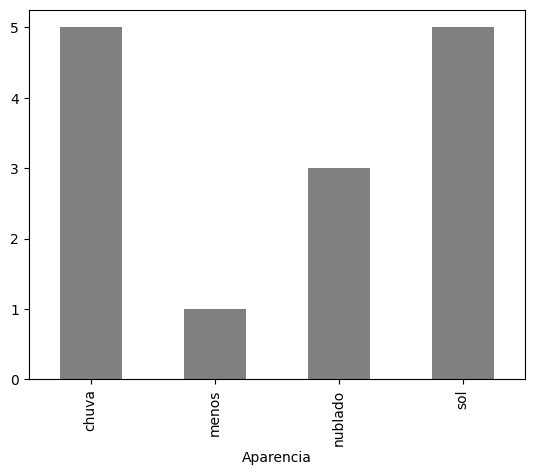

In [24]:
clima.plot.bar(color = 'gray')

In [26]:
# Vento
vento = dataset.groupby('Vento').size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

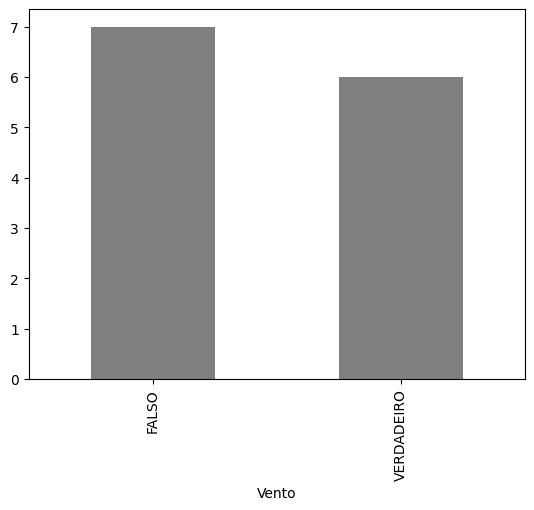

In [27]:
vento.plot.bar(color = 'gray')

In [28]:
# Jogar
jogar = dataset.groupby('Jogar').size()
jogar

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

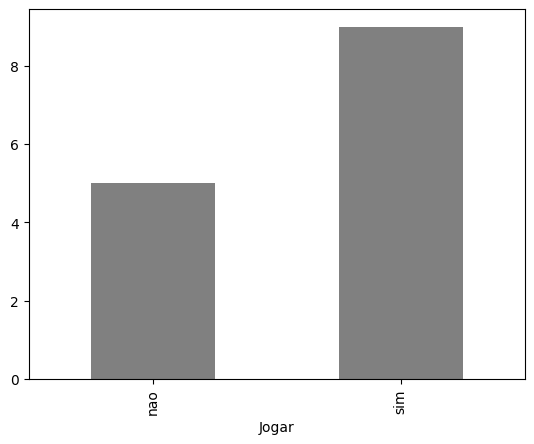

In [29]:
jogar.plot.bar(color = 'gray')

In [30]:
# Explorar colunas numéricas de Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

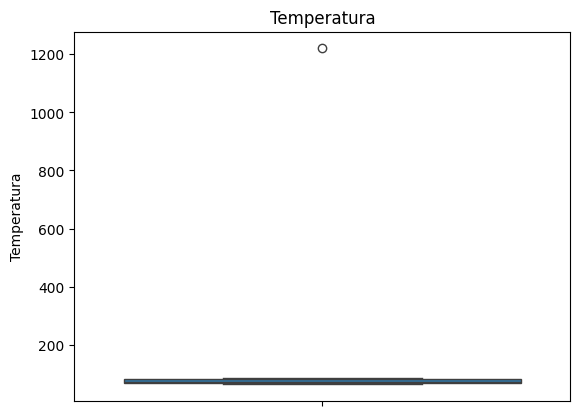

In [31]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

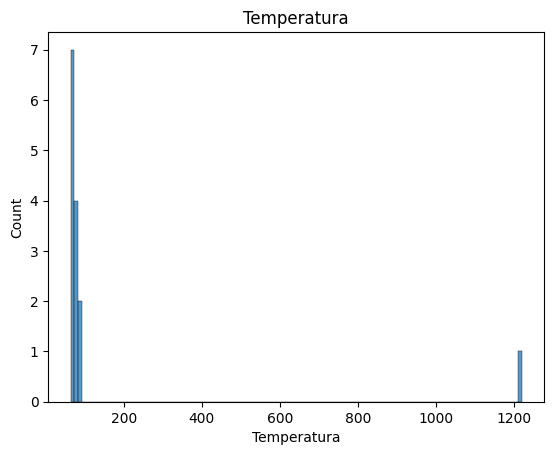

In [32]:
sns.histplot(dataset['Temperatura']).set_title('Temperatura')

In [33]:
# Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

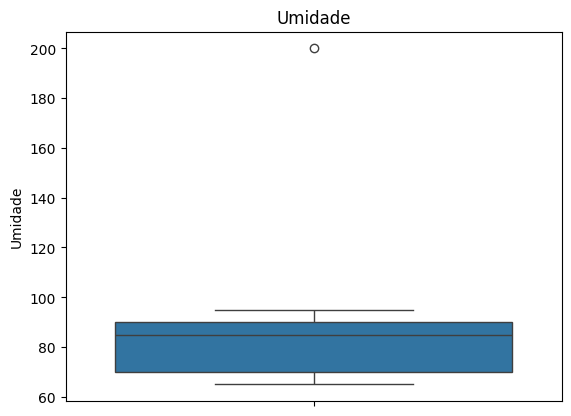

In [34]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

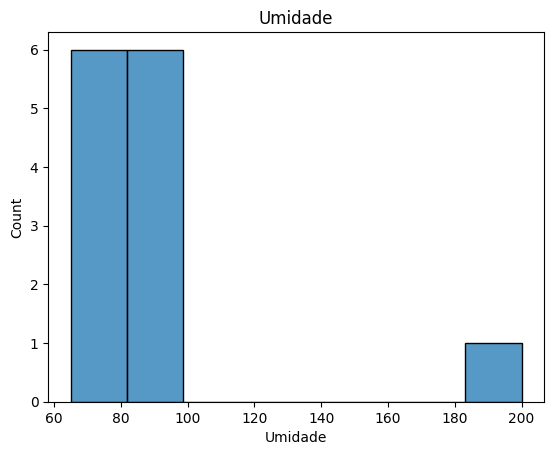

In [36]:
sns.histplot(dataset['Umidade']).set_title('Umidade')

In [41]:
# Verificar valores nulos por coluna
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [43]:
# Aparencia com valor inválido
clima = dataset.groupby(['Aparencia']).size()
clima

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [46]:
# Tratamento
# Alterando menos para sol(se altera para a maior ocorrência(moda), podendo também ser chuva)
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

# Visualizar o resultado
clima = dataset.groupby(['Aparencia']).size()
clima

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [48]:
# Temperatura fora do intervalo
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
# Visualizar intervalo natural de temperatura na terra
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [53]:
# Calcular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [55]:
# Altera o valor fora do intervalo para a mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

# Verifica novamente os valores entre -130 e 130
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [56]:
# Visualiza o resultado
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [57]:
# Umidade fora do intervalo
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
# Visualizar intervalo de umidade
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [60]:
# Calcular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [61]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

# Verifica novamente os valores entre 0 e 100
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [62]:
# Visualiza o resultado
dataset['Umidade'].describe()

count    13.000000
mean     80.961538
std       9.896257
min      65.000000
25%      70.000000
50%      85.000000
75%      90.000000
max      95.000000
Name: Umidade, dtype: float64

In [ ]:
# Tratamento dos valores nulos
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [73]:
# Altera para mediana
dataset['Umidade'].fillna(dataset['Umidade'].median(), inplace=True)

# Altera para moda
dataset['Vento'].fillna('FALSO', inplace=True)

C:\Users\elber\AppData\Local\Temp\ipykernel_12844\37586217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(dataset['Umidade'].median(), inplace=True)


In [70]:
vento = dataset.groupby('Vento').size()
vento

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [77]:
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [78]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64